In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [7]:
bike_data=pd.read_csv('/home/sanchay1190/Downloads/cse_4020_machine_learning/Lab/day.csv',na_values=['NA'])
#bike_data.columns=['instant','dteday','season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual','registered','cnt']
bike_data

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
5          6  2011-01-06       1   0     1        0        4           1   
6          7  2011-01-07       1   0     1        0        5           1   
7          8  2011-01-08       1   0     1        0        6           0   
8          9  2011-01-09       1   0     1        0        0           0   
9         10  2011-01-10       1   0     1        0        1           1   
10        11  2011-01-11       1   0     1        0        2           1   
11        12  2011-01-12       1   0     1        0        3           1   
12        13  2011-01-13       1   0     1        0        4           1   
13        14  2011-01-14       1   0     1        0        5           1   
14        15  2011-01-15       1   0     1        0        6           0   
15        16  2011-01-16       1   0     1        0        0           0   
16        17  2011-01-17       1   0     1        1        1           0   
17        18  2011-01-18       1   0     1        0        2           1   
18        19  2011-01-19       1   0     1        0        3           1   
19        20  2011-01-20       1   0     1        0        4           1   
20        21  2011-01-21       1   0     1        0        5           1   
21        22  2011-01-22       1   0     1        0        6           0   
22        23  2011-01-23       1   0     1        0        0           0   
23        24  2011-01-24       1   0     1        0        1           1   
24        25  2011-01-25       1   0     1        0        2           1   
25        26  2011-01-26       1   0     1        0        3           1   
26        27  2011-01-27       1   0     1        0        4           1   
27        28  2011-01-28       1   0     1        0        5           1   
28        29  2011-01-29       1   0     1        0        6           0   
29        30  2011-01-30       1   0     1        0        0           0   
..       ...         ...     ...  ..   ...      ...      ...         ...   
701      702  2012-12-02       4   1    12        0        0           0   
702      703  2012-12-03       4   1    12        0        1           1   
703      704  2012-12-04       4   1    12        0        2           1   
704      705  2012-12-05       4   1    12        0        3           1   
705      706  2012-12-06       4   1    12        0        4           1   
706      707  2012-12-07       4   1    12        0        5           1   
707      708  2012-12-08       4   1    12        0        6           0   
708      709  2012-12-09       4   1    12        0        0           0   
709      710  2012-12-10       4   1    12        0        1           1   
710      711  2012-12-11       4   1    12        0        2           1   
711      712  2012-12-12       4   1    12        0        3           1   
712      713  2012-12-13       4   1    12        0        4           1   
713      714  2012-12-14       4   1    12        0        5           1   
714      715  2012-12-15       4   1    12        0        6           0   
715      716  2012-12-16       4   1    12        0        0           0   
716      717  2012-12-17       4   1    12        0        1           1   
717      718  2012-12-18       4   1    12        0        2           1   
718      719  2012-12-19       4   1    12        0        3           1   
719      720  2012-12-20       4   1    12        0        4           1   
720      721  2012-12-21       1   1    12        0        5           1   
721      722  2012-12-22       1   1    12        0  

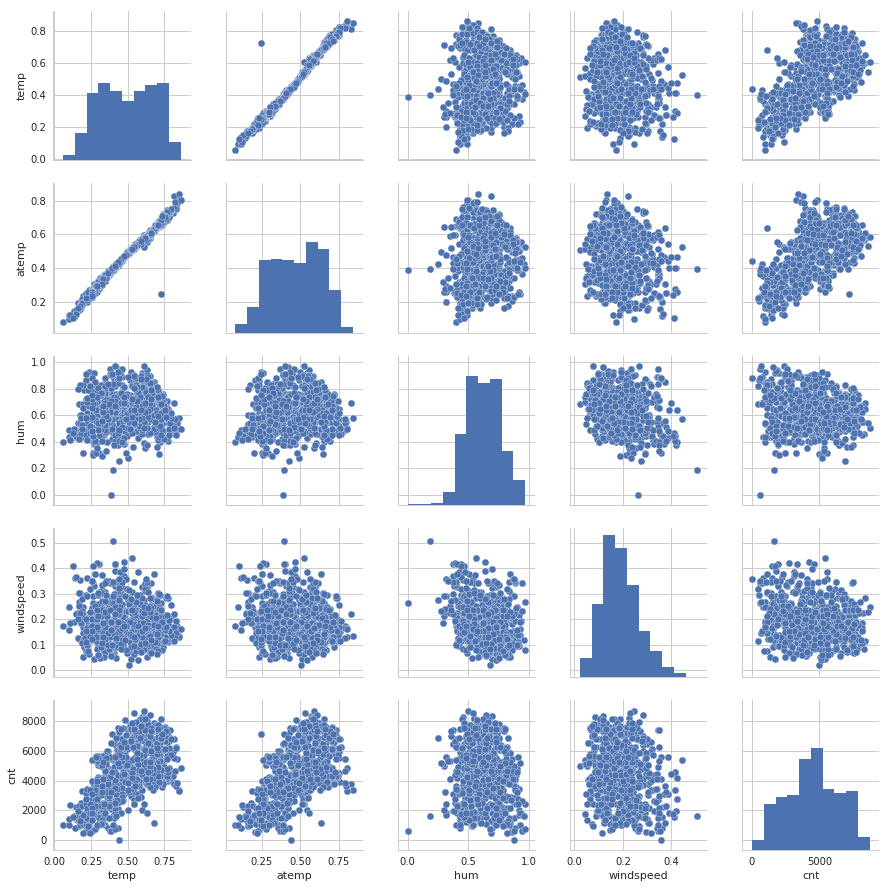

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
sns.pairplot(bike_data[cols], size=2.5);
plt.show()

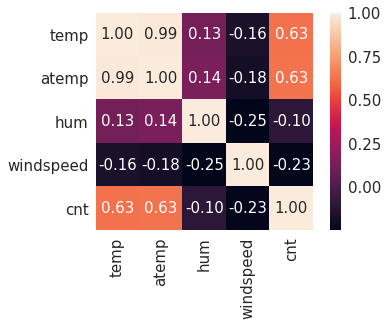

In [11]:
import numpy as np
cm = np.corrcoef(bike_data[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols,xticklabels=cols)
plt.show()

In [13]:
class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X):
        return self.net_input(X)

In [23]:
X = bike_data[['temp']].values
y = bike_data['cnt'].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)
lr = LinearRegressionGD()
lr.fit(X_std, y_std)


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


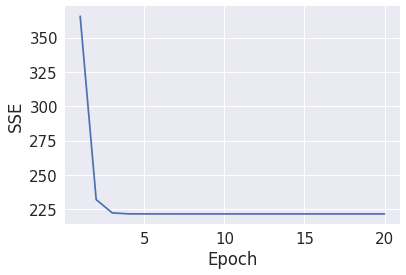

In [24]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

In [25]:
def lin_regplot(X, y, model): 
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')
    return None

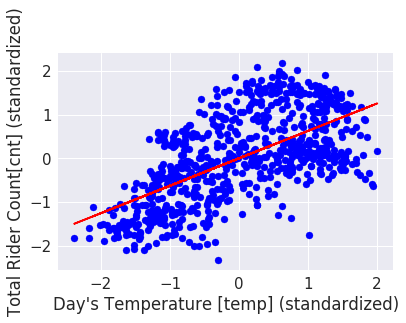

In [27]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Day\'s Temperature [temp] (standardized)')
plt.ylabel('Total Rider Count[cnt] (standardized)')
plt.show()